In [437]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


## Creating Data to View and Fit

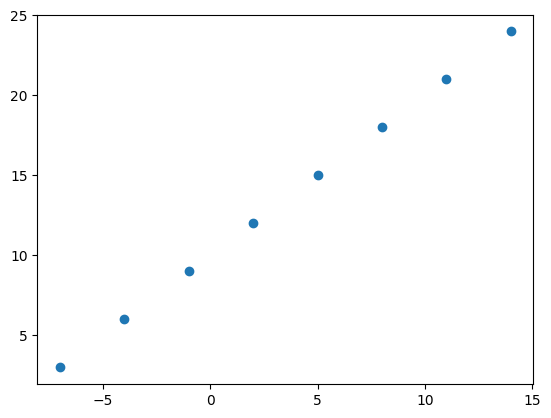

In [438]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) # our output values are input + 10. That's the relationship that we want the machine to learn

plt.scatter(X, y)

In [439]:
# Our input shape is [1] because we are inputting 1 feature
# Our output shape is [1] because
X[0], y[0]

(-7.0, 3.0)

In [440]:
# Transform our NumPy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in Modelling with Tensorflow

1. **Create a Model:** Define input, output, and hidden layers
2. **Compile the Model:** Define the Loss Function (the function that tells our model how wrong it is), define the optimizer (tells our model how to improve the patterns its learning), define the evaluation metrics (the metrics used to determine how well the model is performing)
3. **Fit the Model:** Let the model try to find the patterns mapping X to y (features and labels)

In [441]:
# Create a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # alternative string value "sgd" as shortcode abbreviation
    metrics=["mae"]
)

# Fit the model
# model.fit(X, y, epochs=5, verbose=1) # Deprecated. The Input layer requires a minimum of 2 dimensions. Therefore, we now need to add a dimension
X = tf.expand_dims(X, axis=-1)
X

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [442]:
#y = tf.expand_dims(y, axis = -1) # do we need to do this??
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [443]:
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 381ms/step - loss: 10.4691 - mae: 10.4691
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 10.3366 - mae: 10.3366
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 10.2041 - mae: 10.2041
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 10.0716 - mae: 10.0716
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 9.9391 - mae: 9.9391


In [444]:
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[17.746717]], dtype=float32)

## Improving Models

**Creating a Model:** We can add more layers, increase the number of neurons, change the activation functions of each layer

**Compiling a Model:** Change the activation functions, change the optimizer, change the learning rate (learning rate tells the model how much it should adjust each epoch Default is .001 for Adam)

**Fitting a Model:** Increase the data set, randomize the data set, increase the number of epochs

*NOTE: Learning Rate is usually the biggest bang for the buck for optimization*

In [445]:
# rebuild the model with more epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # alternative string value "sgd" as shortcode abbreviation
    metrics=["mae"]
)
model.fit(X, y, epochs=100, verbose=0)
model.predict([17.0])



1/1 [==============================] - 0s 73ms/step


array([[29.582]], dtype=float32)

In [446]:

# try to get better by adding a layer and changing the optimization
# rebuild the model with more epochs
model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation=None)
])
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=.01), # alternative string value "sgd" as shortcode abbreviation
    metrics=["mae"]
)
model.fit(X, y, epochs=100, verbose=0)
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[26.006493]], dtype=float32)

## Evaluating a Model

We can visualize

The data

The model itself

The training of the model

The predictions of the model

In [447]:
# Make a bigger data set
# A range from -100 to 100 with a step of 4
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [448]:
# Make labels for the data set
y = X + 10 # same relationship as before
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

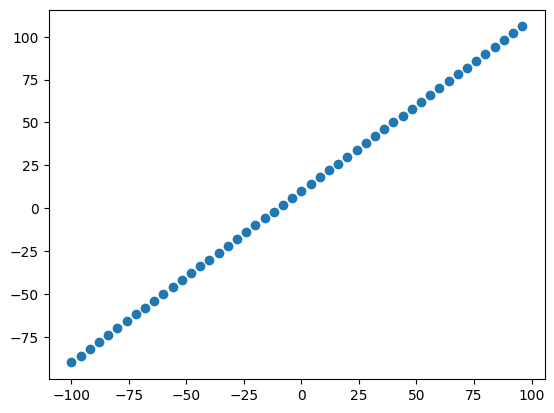

In [449]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [450]:
# Split the features and labels into Training, Validation, and Test Sets (or Training/Test sets)
# Generalization: The ability for the machine learning model to perfrom well on data that it hasn't seen before

print(f"We have {len(X)} data samples")

We have 50 data samples


In [451]:
# split the data into sets
X_train = X[:40] # the first 40 samples
y_train = y[:40]

X_test = X[40:] # from 40 to the end
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

## Visualize the Regression Sets using Scatter Plots
**When doing regression,** use **scatter plots** to visualize the data

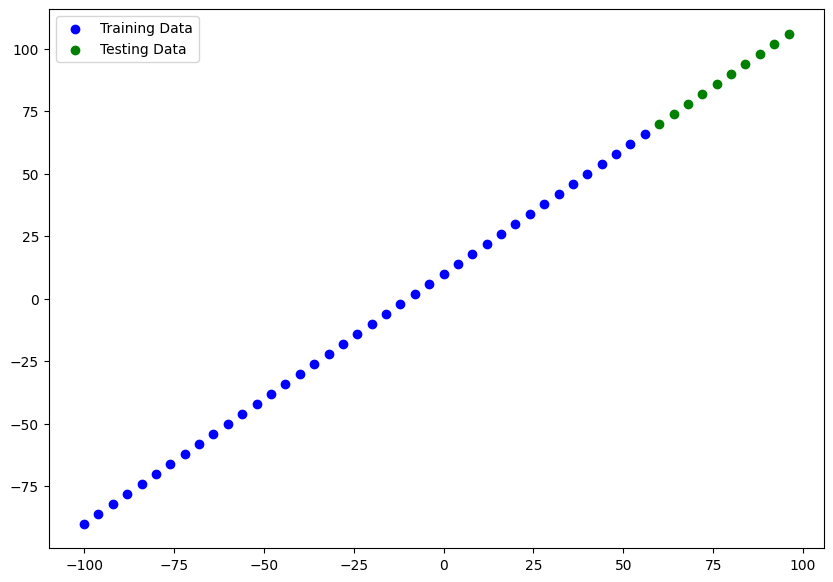

In [452]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training Data") # color blue
plt.scatter(X_test, y_test, c='g', label="Testing Data") # color green
plt.legend() # add a legend based on the labels & colors

In [453]:
# Create the neural network

model = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation=None)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)

X_train = tf.expand_dims(X_train, axis=-1)
y_train = tf.expand_dims(y_train, axis=-1)
#model.fit(X_train, y_train, epochs=100)

## Visualize the Model

Dense = Fully Connected Layer (where the output of each node is sent to all the nodes of the next layer)

In [454]:
model.summary()

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 100)               200       
                                                                 
 dense_122 (Dense)           (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Dense** Fully-Connected Node

**Total Params** Total number of parameters in the model

**Trainable Params** Total number of parameters that are updated (learned) in the model

**Non-Trainable Params** Total number of parameters that stay fixed (i.e. are unchangeable) during the learning process

Watch MIT Introduction to Deep Learning Video: https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI


In [455]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [456]:
model.predict([17])

1/1 [==============================] - 0s 71ms/step


array([[21.890017]], dtype=float32)

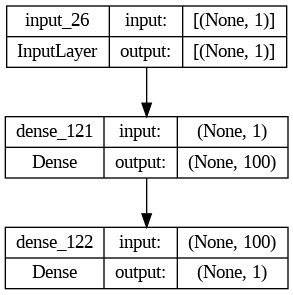

In [457]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

## Visualizing the Models Predictions

Plot the prediction against the ground truth values often called 'y_test' or 'y_true' vs 'y_pred'

In [458]:
#X_test = tf.expand_dims(X_test, axis=-1)
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 62ms/step


array([[ 74.270256],
       [ 79.14284 ],
       [ 84.01542 ],
       [ 88.88799 ],
       [ 93.760574],
       [ 98.633156],
       [103.50574 ],
       [108.37831 ],
       [113.25089 ],
       [118.123474]], dtype=float32)

In [459]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

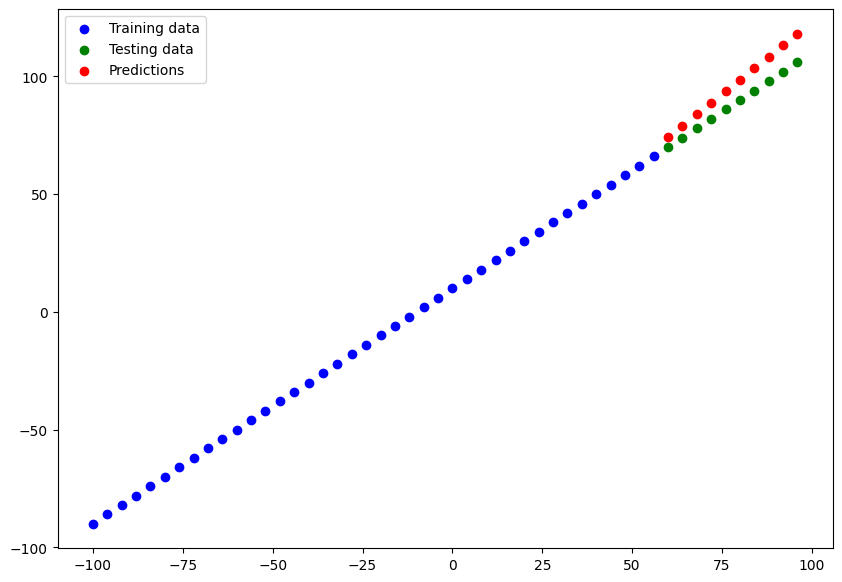

In [460]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

## Evaluating the Prediction with Regression Metrics

When doing regression, the most important metrics are:

MAE : Mean Absolute Error **a great starter metric for any regression problem**

MSE : Mean Square Error **use when larger errors are more significant than smaller errors (as it amplifies the magnitude of larger errors)**

Huber : Combination of MAE & MSE **less sensitive to outliers than MSE**

***This is why we use these metrics in training (fitting) the model***

In [461]:
model.evaluate(X_test, y_test)
# Notice our model showed loss and MAE. It showed MAE because that's what we used when compiling the model.

1/1 [==============================] - 0s 121ms/step - loss: 8.1969 - mae: 8.1969


[8.196866989135742, 8.196866989135742]

In [462]:
# Manually compute MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.637846, 11.942865, 10.396916, 10.      , 10.752115, 12.779894,
       16.00459 , 20.378311, 25.250893, 30.123474], dtype=float32)>

In [463]:
# We got multiple values because y_pred and y_test are different shapes
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [464]:
# Let's squeeze y_pred
y_pred = tf.squeeze(y_pred)
y_test.shape, y_pred.shape

(TensorShape([10]), TensorShape([10]))

In [465]:
# Now let's manually compute the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.196865>

In [466]:
# Notice the manual MAE is the same as the model.evaluate() value above
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=73.47011>

In [467]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

## Running Experiments to Improve Our Model

Top Three

1. Get more data

2. Make the model larger (also called a more complex layer) by adding layers and/or nodes (hidden units)

3. Train longer (more epochs)

In [468]:
X_train, y_train

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-90],
        [-86],
        [-82],
        [-78],
        [-74],
        [-70],
        [-66],
        [-62],
        [-58],
        [-54],
        [-50],
        [-46],
        [-42],
        [-38],
        [-34],
        [-30],
        

## Keeping track of experiments

TensorBoard

Weights and Biases: https://wandb.ai/site
